<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pointwise-Local-Reconstruction-Error" data-toc-modified-id="Pointwise-Local-Reconstruction-Error-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pointwise Local Reconstruction Error</a></span></li></ul></div>

Pointwise Local Reconstruction Error
====================================

Example for the usage of the `skcosmo.metrics.pointwise_local_reconstruction_error` as pointwise local reconstruction error (LFRE) on the degenerate CH4 manifold.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skcosmo.datasets import load_degenerate_CH4_manifold
from skcosmo.metrics import pointwise_local_reconstruction_error

# load features
degenerate_manifold = load_degenerate_CH4_manifold()
soap_features = degenerate_manifold.data.SOAP_power_spectrum
bispectrum_features = degenerate_manifold.data.SOAP_bispectrum

In [3]:
print(degenerate_manifold.DESCR)

.. _degenerate_manifold:

Degenerate manifold
-------------------

**Data Set Characteristics:**  

    :Number of Instances: Each representation 162

    :Number of Features: Each  representation 12

The dataset contains two representations (SOAP power spectrum and bispectrum) of the two manifolds spanned by the carbon atoms of two times 81 methane structures [1]_.
The SOAP power spectrum representation the two manifolds intersect creating a degenerate manifold/line for which the representation remains the same.
In contrast for higher body order representations as the (SOAP) bispectrum the carbon atoms can be uniquely represented and do not create a degenerate manifold.
Following the naming convention of Ref. [1]_ for each representation the first 81 samples correspond to the X minus manifold and the second 81 samples contain the X plus manifold 
The representations were computed with [2]_ using the hyperparameters:

    :rascal hyperparameters:

    +---------------------------+-----

In [4]:
n_local_points = 20

print("Computing pointwise LFRE...")
soap_to_bispectrum_pointwise_lfre = pointwise_local_reconstruction_error(
    soap_features,
    bispectrum_features,
    n_local_points,
    estimator=None,
    n_jobs=4,
)
bispectrum_to_soap_pointwise_lfre = pointwise_local_reconstruction_error(
    bispectrum_features,
    soap_features,
    n_local_points,
    estimator=None,
    n_jobs=4,
)
print("Computing pointwise LFRE finished.")

print(
    "LFRE(3-body, 4-body) = "
    f"{np.linalg.norm(soap_to_bispectrum_pointwise_lfre)/np.sqrt(len(soap_to_bispectrum_pointwise_lfre))}"
)
print(
    "LFRE(4-body, 3-body) = "
    f"{np.linalg.norm(bispectrum_to_soap_pointwise_lfre)/np.sqrt(len(soap_to_bispectrum_pointwise_lfre))}"
)

Computing pointwise LFRE...
Computing pointwise LFRE finished.
LFRE(3-body, 4-body) = 0.16160962875496712
LFRE(4-body, 3-body) = 3.4236500380471084e-10


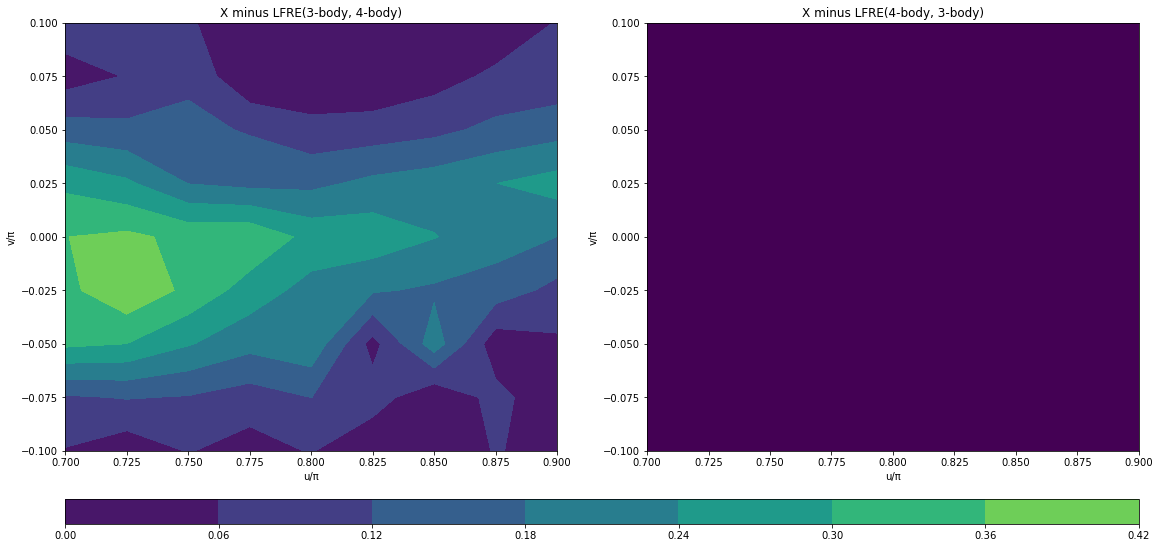

In [5]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(16, 7.5))
vmax = 0.5
X, Y = np.meshgrid(np.linspace(0.7, 0.9, 9), np.linspace(-0.1, 0.1, 9))
pcm = axes[0].contourf(
    X, Y, soap_to_bispectrum_pointwise_lfre[81:].reshape(9, 9).T, vmin=0, vmax=vmax
)
axes[1].contourf(
    X, Y, bispectrum_to_soap_pointwise_lfre[81:].reshape(9, 9).T, vmin=0, vmax=vmax
)
axes[0].set_ylabel("v/π")
axes[1].set_ylabel("v/π")
axes[0].set_xlabel("u/π")
axes[1].set_xlabel("u/π")
axes[0].set_title("X minus LFRE(3-body, 4-body)")
axes[1].set_title("X minus LFRE(4-body, 3-body)")
fig.colorbar(pcm, ax=axes, label="", location="bottom")
plt.show()

It can be seen that the reconstruction of 4-body features using 3-body features is most significant along the degenerate manifold/line. Within this manifold the 3-body features remain the same and can therefore not reconstruct the 4-body features. While the 4-body features can perfectly reconstruct the 3-body features.